In [2]:
import pandas as pd

df = pd.read_csv('/content/ed_visits_estimates_2016_2022.csv')

df.head()



,Year,Measure Type,Leading 10 Ranking,Measure,Group,Subgroup,Estimate Type,Estimate,Standard Error,Lower 95% CI,Upper 95% CI,Reliable
0,2016,By primary diagnosis,0,All diagnoses,Total,All visits,Visit count,145591000.0,8798000.0,128347000.0,162835000.0,Yes
1,2016,By primary diagnosis,0,All diagnoses,By sex,Female,Visit count,79595000.0,4803000.0,70182000.0,89008000.0,Yes
2,2016,By primary diagnosis,0,All diagnoses,By sex,Male,Visit count,65996000.0,4119000.0,57923000.0,74070000.0,Yes
3,2016,By primary diagnosis,0,All diagnoses,By age,0-17 years old,Visit count,32146000.0,2840000.0,26579000.0,37713000.0,Yes
4,2016,By primary diagnosis,0,All diagnoses,By age,18-44 years old,Visit count,55978000.0,3436000.0,49243000.0,62713000.0,Yes


In [3]:
df.columns.tolist()


['Year',
 'Measure Type',
 'Leading 10 Ranking',
 'Measure',
 'Group',
 'Subgroup',
 'Estimate Type',
 'Estimate',
 'Standard Error',
 'Lower 95% CI',
 'Upper 95% CI',
 'Reliable']

In [4]:

print("Unique measures:", df['Measure'].unique())
print("Unique groups:", df['Group'].unique())
print("Unique subgroups:", df['Subgroup'].unique())


Unique measures: ['All diagnoses'
 '1. Symptoms, signs, and abnormal clinical and laboratory findings'
 '2. Injury and poisoning' '3. Diseases of the respiratory system'
 '4. Diseases of the musculoskeletal system and connective tissue'
 '5. Diseases of the digestive system'
 '6. Diseases of the genitourinary system'
 '7. Mental, behavioral, and neurodevelopmental disorders'
 '8. Diseases of the circulatory system'
 '9. Certain infectious and parasitic diseases'
 '10. Diseases of the skin and subcutaneous tissue' 'All reasons'
 '1. Stomach and abdominal pain, cramps and spasms'
 '2. Chest pain and related symptoms (not referable to body systems)'
 '3. Cough' '4. Shortness of breath' '5. Fever'
 '6. Headache, pain in head'
 '7. Pain, site not referable to a specific body system'
 '8. Back symptoms' '9. Vomiting'
 '10. Other symptoms/problems related to psychological and mental disorders']
Unique groups: ['Total' 'By sex' 'By age' 'By race/ethnicity' 'By region'
 'By metropolitan statist

      Year     Estimate
0     2016  145591000.0
3388  2016        457.8
242   2017  138977000.0
3630  2017        433.4
3872  2018        403.5
484   2018  129974000.0
726   2019  150650000.0
4114  2019        466.1
968   2020  131297000.0
4356  2020        404.6
4598  2021        427.2
1210  2021  139781000.0
1452  2022  155398000.0
4840  2022        472.9


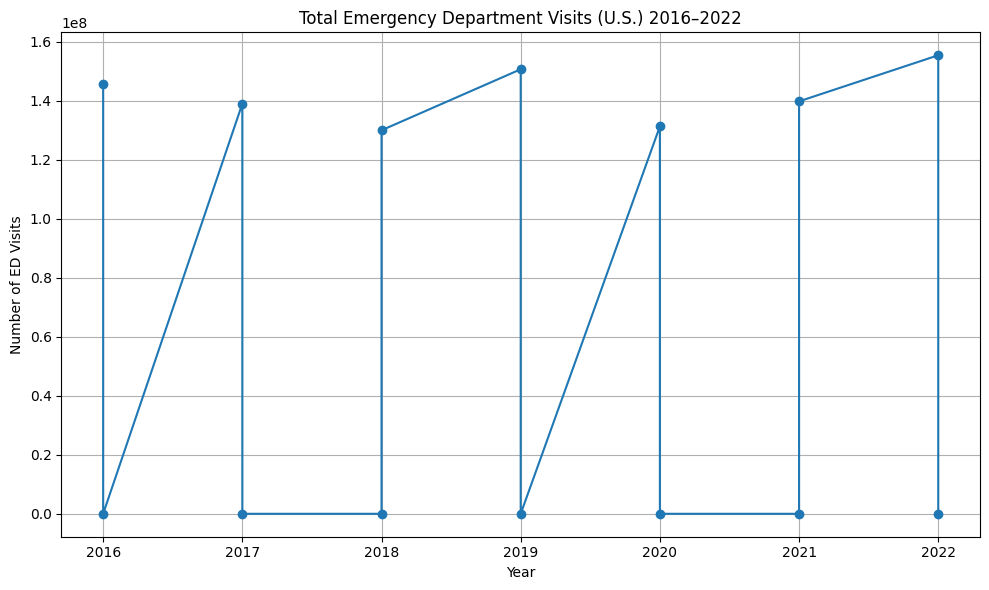

In [5]:
# Filter for total ER visits by year
df_total = df[
    (df['Group'] == 'Total') &
    (df['Subgroup'] == 'All visits') &
    (df['Measure'] == 'All diagnoses')
]

# Keep only year + estimate
df_total = df_total[['Year', 'Estimate']]

# Sort by year
df_total = df_total.sort_values('Year')

# Preview cleaned data
print(df_total)

# Plot the trend
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_total['Year'], df_total['Estimate'], marker='o', linestyle='-')
plt.title('Total Emergency Department Visits (U.S.) 2016–2022')
plt.xlabel('Year')
plt.ylabel('Number of ED Visits')
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
df_total.to_csv('ed_visits_total_by_year.csv', index=False)


In [7]:
from google.colab import files
files.download('ed_visits_total_by_year.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

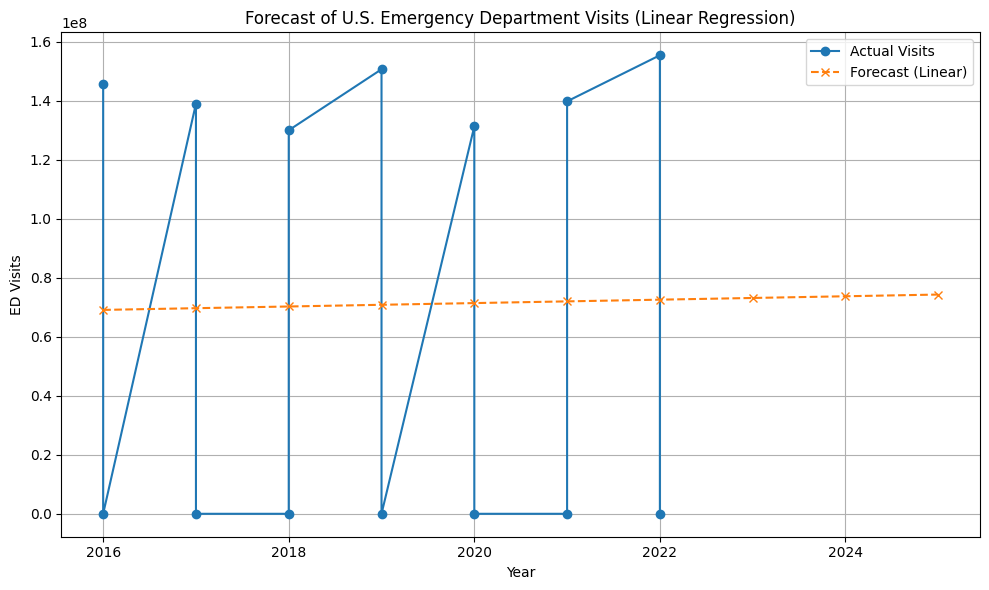

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/ed_visits_total_by_year.csv')

X = df[['Year']]
y = df['Estimate']

model = LinearRegression()
model.fit(X, y)

# Predict existing and future years
future_years = pd.DataFrame({'Year': list(range(2016, 2026))})
future_preds = model.predict(future_years)

# Plot actual + forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Estimate'], label='Actual Visits', marker='o')
plt.plot(future_years['Year'], future_preds, label='Forecast (Linear)', linestyle='--', marker='x')
plt.title('Forecast of U.S. Emergency Department Visits (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('ED Visits')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
